# V - Merging esbae with CEO data 
### This script serves to merge validated data from CEO with eSBAE points for quick estimation of areas
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### combine all CEO sample files
##### add as many CEO files as there are projects

In [2]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data_prov.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#GAB
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')

##### drop duplicates from ceo collections
###### keep first duplicate by date

In [3]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17', 'pl_wetness_mean', 'p

##### merge all ceo files

In [4]:
#make a list of the ceo files first
ceo_files = [ceo1, ceo2, ceo3, ceo4, ceo5]

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
##### count the number of validated points per ceo file

In [5]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=False, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='pl_point_id', keep='last', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 
                    'sample_geom', 'pl_point_id', 'pl_chg_prob', 'pl_simple_combined', 'pl_strata', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'Commentaires', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

ceo 1 # of validated points: 499, # of not validated points: 0
ceo 2 # of validated points: 3524, # of not validated points: 0
ceo 3 # of validated points: 367, # of not validated points: 4260
ceo 4 # of validated points: 49, # of not validated points: 4211
ceo 5 # of validated points: 594, # of not validated points: 3617


In [6]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection_time', ascending=False)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='pl_point_id', keep='last')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

In [7]:
merged_ceo_nodup['interpreted'].value_counts()

1    4987
Name: interpreted, dtype: int64

In [8]:
print(merged_ceo_nodup.dtypes)

plotid                                            int64
sampleid                                          int64
lon                                             float64
lat                                             float64
email                                            object
flagged                                          object
collection_time                                  object
analysis_duration                                object
sample_geom                                      object
pl_point_id                                       int64
pl_chg_prob                                     float64
pl_simple_combined                              float64
pl_strata                                         int64
forêt ou non-forêt en 2015?                      object
Y'a t'il de la régéneration                      object
Changement entre 2015-2022                       object
Type de Changement (2015-2022)                   object
Exploitation forestière artisanale (<5ha)       

In [9]:
# Rename columns to be same as esbae 
merged_ceo_nodup = merged_ceo_nodup.rename(columns={'pl_point_id': 'point_id'})
merged_ceo_nodup = merged_ceo_nodup.rename(columns={'pl_strata': 'stratum'})
merged_ceo_nodup = merged_ceo_nodup.rename(columns={'pl_chg_prob': 'chg_prob'})
merged_ceo_nodup = merged_ceo_nodup.rename(columns={'pl_simple_combined': 'simple_combined'})
#merged_ceo = merged_ceo.rename(columns={'pl_plotid_orig': 'plotid_orig'})

In [10]:
merged_ceo_nodup['stratum'].value_counts()

2    3068
3    1616
1     303
Name: stratum, dtype: int64

##### Check if values in 'pointid' are unique

In [11]:
# this might take some time
unique_check = merged_ceo_nodup['point_id'].nunique() == len(merged_ceo_nodup['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection)

In [12]:
# Find duplicate values in the 'ID' column
duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
len(duplicate_ids)

0

In [13]:
#merged_ceo_nodup.head()

#### read all esbae points with augmented data (output from script 5)

In [14]:
# Read the CSV files
#DRC
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/DRC_esbae_2015_2022_model.csv')
#GAB
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_esbae_2015_2022_model.csv')
len(esbae)

222878

In [15]:
#DRC
#esbae = esbae[['point_id', 'PLOTID', 'LAT','LON','stratum', 'chg_prob', 'simple_combined','NOM']]
#GAB
esbae = esbae[['point_id', 'PLOTID', 'LAT','LON','stratum', 'chg_prob', 'simple_combined']]

In [16]:
esbae.columns

Index(['point_id', 'PLOTID', 'LAT', 'LON', 'stratum', 'chg_prob',
       'simple_combined'],
      dtype='object')

In [17]:
#save this for eSBAE calculations
esbae['stratum'].value_counts()

1    172836
2     39981
3     10061
Name: stratum, dtype: int64

##### Rename columns to be same as ceo file 

In [18]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})
esbae['interpreted']=0

In [19]:
print(esbae.dtypes)

point_id             int64
plotid               int64
lat                float64
lon                float64
stratum              int64
chg_prob           float64
simple_combined    float64
interpreted          int64
dtype: object


In [20]:
len(esbae)

222878

### Merge ceo and sbae tables
#### replace validated points in esbae points

In [21]:
#make list of point_ids of validated points
validated_id_list = merged_ceo_nodup['point_id'].tolist()
len(validated_id_list)

4987

In [22]:
# Remove validated points from esbae
# Remove rows from 'esbae' where 'point_id' is in 'merged_ceo'
esbae_not_interpreted = esbae[~esbae['point_id'].isin(validated_id_list)]
len(esbae_not_interpreted)

217891

In [23]:
# Merge the DataFrames based on 'point_id'
merged_df = esbae_not_interpreted.merge(merged_ceo_nodup, on='point_id', how='inner')

# Get the count of matching rows
matching_rows_count = len(merged_df)

# Print the count of matching rows
print(f'Number of matching rows: {matching_rows_count}')

Number of matching rows: 0


In [24]:
#append esbae and ceo

In [25]:
# Append 'ceo' to 'esbae' keeping all columns from 'ceo' and merging common columns
esbae_ceo = pd.concat([esbae_not_interpreted, merged_ceo_nodup], axis=0, ignore_index=True)

# Print the resulting DataFrame
len(esbae_ceo)

222878

In [26]:
esbae_ceo.columns

Index(['point_id', 'plotid', 'lat', 'lon', 'stratum', 'chg_prob',
       'simple_combined', 'interpreted', 'sampleid', 'email', 'flagged',
       'collection_time', 'analysis_duration', 'sample_geom',
       'forêt ou non-forêt en 2015?', 'Y'a t'il de la régéneration',
       'Changement entre 2015-2022', 'Type de Changement (2015-2022)',
       'Exploitation forestière artisanale (<5ha)',
       'Activité minière artisanale', 'Infrastructure routière',
       'Infrastructure d’urbanisation ou habitations',
       'Exploitation forestière industrielle (>5ha)', 'Autre moteur',
       'Descriptif autre moteur', 'Activité minière industrielle',
       'Agriculture industrielle', 'Agriculture paysanne',
       'Année de Changement', 'Type de non-forêt en 2015',
       'Type de forêt en 2015', 'Commentaires', 'collection'],
      dtype='object')

In [27]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)
# Change the data type of 'FloatColumn' to integer
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].astype(int)
esbae_ceo['interpreted'].value_counts()

0    217891
1      4987
Name: interpreted, dtype: int64

## add new columns for change and year

#### clean up columns and replace values

In [28]:
def f(x):
  if x['Type de Changement (2015-2022)'] == 'déforestation': return 'Def'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' : return 'Deg'
  elif x['forêt ou non-forêt en 2015?'] == 'non-forêt' : return 'NF'
  elif x['Changement entre 2015-2022'] == 'non' : return 'Stable'
  else: return ''

esbae_ceo['ChangeType'] = esbae_ceo.apply(f, axis=1)
esbae_ceo['ChangeType'].value_counts()

          217891
Stable      3726
NF          1091
Deg          112
Def           58
Name: ChangeType, dtype: int64

In [29]:
def y(x):
  if x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2016: return 'Def2016'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2017: return 'Def2017'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2018: return 'Def2018'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2019: return 'Def2019'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2020: return 'Def2020'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2021: return 'Def2021'
  elif x['Type de Changement (2015-2022)'] == 'déforestation' and x['Année de Changement'] == 2022: return 'Def2022'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2016: return 'Deg2016'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2017: return 'Deg2017'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2018: return 'Deg2018'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2019: return 'Deg2019'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2020: return 'Deg2020'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2021: return 'Deg2021'
  elif x['Type de Changement (2015-2022)'] == 'dégradation' and x['Année de Changement'] == 2022: return 'Deg2022'
  elif x['forêt ou non-forêt en 2015?'] == 'non-forêt' : return 'NF'
  elif x['Changement entre 2015-2022'] == 'non' : return 'Stable'
  else: return ''

esbae_ceo['ChangeYear'] = esbae_ceo.apply(y, axis=1)

annual_counts = esbae_ceo['ChangeYear'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

           217891
Def2016        15
Def2017        11
Def2018         6
Def2019         2
Def2020         6
Def2021         7
Def2022        11
Deg2016        14
Deg2017        12
Deg2018        14
Deg2019        10
Deg2020        19
Deg2021        14
Deg2022        29
NF           1091
Stable       3726
Name: ChangeYear, dtype: int64


In [30]:
annual_counts.sum()

222878

##### plot deforestation points by year

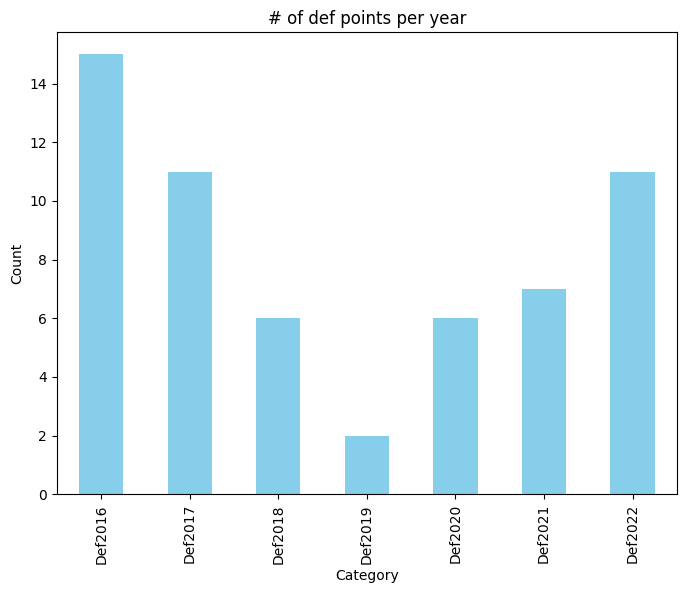

In [31]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['ChangeYear'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['ChangeYear'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

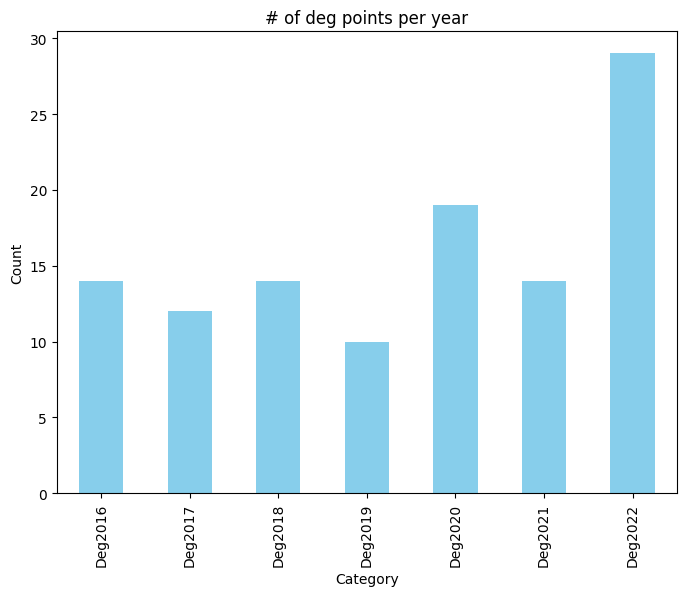

In [32]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['ChangeYear'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['ChangeYear'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [33]:
esbae_ceo.head()

,point_id,plotid,lat,lon,stratum,chg_prob,simple_combined,interpreted,sampleid,email,flagged,collection_time,analysis_duration,sample_geom,forêt ou non-forêt en 2015?,Y'a t'il de la régéneration,Changement entre 2015-2022,Type de Changement (2015-2022),Exploitation forestière artisanale (<5ha),Activité minière artisanale,Infrastructure routière,Infrastructure d’urbanisation ou habitations,Exploitation forestière industrielle (>5ha),Autre moteur,Descriptif autre moteur,Activité minière industrielle,Agriculture industrielle,Agriculture paysanne,Année de Changement,Type de non-forêt en 2015,Type de forêt en 2015,Commentaires,collection,ChangeType,ChangeYear
0,25921,25921,0.985209,10.808075,1,0.061333,0.061333,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
1,25922,25922,0.994860,10.813032,1,0.029333,0.029333,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2,37361,37361,-2.113984,9.518357,1,0.103333,0.103333,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3,37362,37362,-2.104343,9.523366,1,0.044667,0.044667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4,37781,37781,-2.113978,9.528307,1,0.108000,0.108000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [34]:
print(esbae_ceo.columns.values)

['point_id' 'plotid' 'lat' 'lon' 'stratum' 'chg_prob' 'simple_combined'
 'interpreted' 'sampleid' 'email' 'flagged' 'collection_time'
 'analysis_duration' 'sample_geom' 'forêt ou non-forêt en 2015?'
 "Y'a t'il de la régéneration" 'Changement entre 2015-2022'
 'Type de Changement (2015-2022)'
 'Exploitation forestière artisanale (<5ha)' 'Activité minière artisanale'
 'Infrastructure routière' 'Infrastructure d’urbanisation ou habitations'
 'Exploitation forestière industrielle (>5ha)' 'Autre moteur'
 'Descriptif autre moteur' 'Activité minière industrielle'
 'Agriculture industrielle' 'Agriculture paysanne' 'Année de Changement'
 'Type de non-forêt en 2015' 'Type de forêt en 2015' 'Commentaires'
 'collection' 'ChangeType' 'ChangeYear']


In [35]:
merged_annual_counts = esbae_ceo['ChangeYear'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

           217891
Def2016        15
Def2017        11
Def2018         6
Def2019         2
Def2020         6
Def2021         7
Def2022        11
Deg2016        14
Deg2017        12
Deg2018        14
Deg2019        10
Deg2020        19
Deg2021        14
Deg2022        29
NF           1091
Stable       3726
Name: ChangeYear, dtype: int64

In [36]:
esbae_ceo.describe()

,point_id,plotid,lat,lon,stratum,chg_prob,simple_combined,interpreted,sampleid,Année de Changement,collection
count,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,4987.000000,170.000000,4987.000000
mean,112590.241756,112277.624597,-0.605674,11.789000,1.275047,0.090761,0.090761,0.022375,91632.625627,2019.200000,2.331863
std,64745.112261,64934.327732,1.364103,1.379958,0.540407,0.110037,0.110037,0.147902,77313.842312,2.223064,1.061276
min,5.000000,1.000000,-3.951404,8.699735,1.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,1.000000
25%,56616.250000,56131.250000,-1.631947,10.696994,1.000000,0.025333,0.025333,0.000000,12548.000000,2017.000000,2.000000
50%,112471.500000,112169.500000,-0.657397,11.745932,1.000000,0.058667,0.058667,0.000000,80555.000000,2020.000000,2.000000
75%,168541.750000,168391.750000,0.473475,12.918008,1.000000,0.106000,0.106000,0.000000,160456.500000,2021.000000,2.000000
max,225179.000000,225179.000000,2.315793,14.524399,3.000000,0.963333,0.963333,1.000000,225179.000000,2022.000000,5.000000


In [37]:
print(esbae_ceo.dtypes)

point_id                                          int64
plotid                                            int64
lat                                             float64
lon                                             float64
stratum                                           int64
chg_prob                                        float64
simple_combined                                 float64
interpreted                                       int64
sampleid                                        float64
email                                            object
flagged                                          object
collection_time                                  object
analysis_duration                                object
sample_geom                                      object
forêt ou non-forêt en 2015?                      object
Y'a t'il de la régéneration                      object
Changement entre 2015-2022                       object
Type de Changement (2015-2022)                  

In [38]:
esbae_ceo_columns = ['point_id' 'plotid' 'lat' 'lon' 'stratum' 'chg_prob' 'simple_combined'
 'NOM' 'interpreted' 'sampleid' 'email' 'flagged' 'collection_time'
 'analysis_duration' 'sample_geom' 'forêt ou non-forêt en 2015?'
 "Y'a t'il de la régéneration" 'Changement entre 2015-2022'
 'Type de Changement (2015-2022)'
 'Exploitation forestière artisanale (<5ha)' 'Activité minière artisanale'
 'Infrastructure routière' 'Infrastructure d’urbanisation ou habitations'
 'Exploitation forestière industrielle (>5ha)' 'Autre moteur'
 'Descriptif autre moteur' 'Activité minière industrielle'
 'Agriculture industrielle' 'Agriculture paysanne' 'Année de Changement'
 'Type de non-forêt en 2015' 'Type de forêt en 2015' 'Commentaires'
 'collection' 'ChangeType' 'ChangeYear']

In [39]:
len(esbae_ceo)

222878

##### export merged esbae and ceo data to one csv file for next step

In [40]:
data_out =  '/home/sepal-user/module_results/esbae/GAB/GAB_esbae_ceo_merge.csv'
esbae_ceo.to_csv(data_out,index=True)

#### now move on to calculation of areas - script 6b